In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

In [4]:
df=pd.read_csv("supermarket_sales - Sheet1.csv")
df=pd.DataFrame(df[['Quantity','Tax 5%','Rating']],range(0,100))
df


,Quantity,Tax 5%,Rating
0,7,26.1415,9.1
1,5,3.8200,9.6
2,7,16.2155,7.4
3,8,23.2880,8.4
4,7,30.2085,5.3
...,...,...,...
95,1,4.8580,7.2
96,10,43.9350,5.1
97,6,3.7350,4.1
98,3,7.9125,9.3


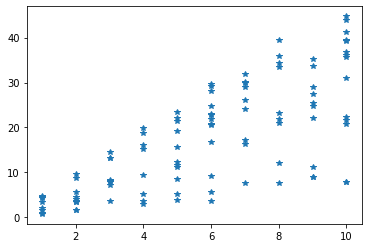

In [4]:
plt.plot(df['Quantity'],df['Tax 5%'],'*')
plt.show()

In [5]:
scale_data = preprocessing.normalize(df,norm='l1',axis=0)
df_data = pd.DataFrame(scale_data,index=df.index,columns=df.columns)
print(df_data)

    Quantity    Tax 5%    Rating
0   0.012027  0.014988  0.013202
1   0.008591  0.002190  0.013927
2   0.012027  0.009297  0.010736
3   0.013746  0.013352  0.012186
4   0.012027  0.017320  0.007689
..       ...       ...       ...
95  0.001718  0.002785  0.010445
96  0.017182  0.025190  0.007399
97  0.010309  0.002141  0.005948
98  0.005155  0.004537  0.013492
99  0.010309  0.014225  0.010736

[100 rows x 3 columns]


In [6]:
std_scale = preprocessing.StandardScaler().fit(df[['Quantity', 'Tax 5%']])
df_std = std_scale.transform(df[['Quantity', 'Tax 5%']])
print(df_data)

    Quantity    Tax 5%    Rating
0   0.012027  0.014988  0.013202
1   0.008591  0.002190  0.013927
2   0.012027  0.009297  0.010736
3   0.013746  0.013352  0.012186
4   0.012027  0.017320  0.007689
..       ...       ...       ...
95  0.001718  0.002785  0.010445
96  0.017182  0.025190  0.007399
97  0.010309  0.002141  0.005948
98  0.005155  0.004537  0.013492
99  0.010309  0.014225  0.010736

[100 rows x 3 columns]


In [8]:
print('Mean after standardization:\nQuantity={:.2f}, Tax 5%={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))
print('\nStandard deviation after standardization:\nQuantity={:.2f}, Tax 5%={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std()))

Mean after standardization:
Quantity=-0.00, Tax 5%=0.00

Standard deviation after standardization:
Quantity=1.00, Tax 5%=1.00


In [9]:
minmax_scale = preprocessing.MinMaxScaler().fit(df[['Quantity', 'Tax 5%']])
df_minmax = minmax_scale.transform(df[['Quantity', 'Tax 5%']])
print(df_minmax)

[[0.66666667 0.57700399]
 [0.44444444 0.06933373]
 [0.66666667 0.35125146]
 [0.77777778 0.51210526]
 [0.66666667 0.66950203]
 [0.66666667 0.66217861]
 [0.55555556 0.45215325]
 [1.         0.8189613 ]
 [0.11111111 0.06492148]
 [0.22222222 0.16954183]
 [0.33333333 0.04831868]
 [0.33333333 0.09849097]
 [0.44444444 0.24940582]
 [1.         0.47360042]
 [1.         0.79417083]
 [0.55555556 0.62191114]
 [0.66666667 0.53115298]
 [0.55555556 0.47787621]
 [0.22222222 0.16896187]
 [0.11111111 0.07410987]
 [0.44444444 0.47166722]
 [0.22222222 0.28260004]
 [0.11111111 0.05796195]
 [0.44444444 0.17895766]
 [0.22222222 0.28481754]
 [0.77777778 0.46088677]
 [0.         0.02057155]
 [0.11111111 0.18184609]
 [0.44444444 0.48485848]
 [0.88888889 0.23719254]
 [0.44444444 0.51766606]
 [0.88888889 0.78146855]
 [0.77777778 0.74463536]
 [0.11111111 0.2021106 ]
 [0.33333333 0.4346862 ]
 [0.         0.0599179 ]
 [0.44444444 0.3385037 ]
 [0.88888889 0.60553578]
 [0.77777778 0.48208376]
 [0.77777778 0.2564677 ]


In [10]:
print('Min-value after min-max scaling:\nQuantity={:.2f}, Tax 5%={:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nQuantity={:.2f}, Tax 5%={:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max()))

Min-value after min-max scaling:
Quantity=0.00, Tax 5%=0.00

Max-value after min-max scaling:
Quantity=1.00, Tax 5%=1.00


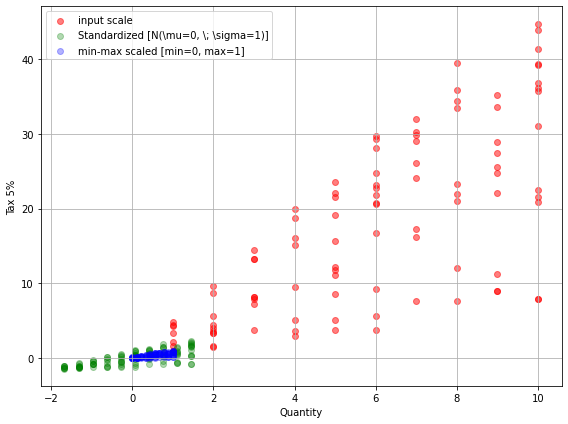

In [13]:
plt.figure(figsize=(8,6))

plt.scatter(df['Quantity'], df['Tax 5%'],
            color='red', label='input scale', alpha=0.5)

plt.scatter(df_std[:,0], df_std[:,1], color='green',
            label='Standardized [N(\mu=0, \; \sigma=1)]', alpha=0.3)

plt.scatter(df_minmax[:,0], df_minmax[:,1],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

plt.xlabel('Quantity')
plt.ylabel('Tax 5%')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()

In [12]:
df = pd.read_csv('Country.csv')
df

,Name,Code,pop_growth,pop,area
0,Brazil,BRA,0.817556,2.080000e+08,8358140.0
1,Switzerland,CHE,1.077221,8.370000e+06,39516.0
2,Germany,DEU,1.193867,8.260000e+07,348900.0
3,Denmark,DNK,0.834638,NaN,42262.0
4,Spain,ESP,-0.008048,4.640000e+07,500210.0
5,France,FRA,0.407491,6.680000e+07,547557.0
6,Japan,JPN,-0.115284,1.260000e+08,364560.0
7,Greece,GRC,0.687543,1.070000e+07,128900.0
8,Iran,IRN,1.148789,8.020000e+07,1628760.0
9,Kuwait,KWT,2.924206,4.050000e+06,NaN


In [13]:
df.drop(columns='Code', inplace=True)
df.rename(index=df.Name,inplace=True)
df.dropna(inplace=True)
df.fillna(method='ffill', inplace=True)
df

,Name,pop_growth,pop,area
Brazil,Brazil,0.817556,2.080000e+08,8358140.0
Switzerland,Switzerland,1.077221,8.370000e+06,39516.0
Germany,Germany,1.193867,8.260000e+07,348900.0
Spain,Spain,-0.008048,4.640000e+07,500210.0
France,France,0.407491,6.680000e+07,547557.0
Japan,Japan,-0.115284,1.260000e+08,364560.0
Greece,Greece,0.687543,1.070000e+07,128900.0
Iran,Iran,1.148789,8.020000e+07,1628760.0
Nigeria,Nigeria,2.619034,1.850000e+08,910770.0
Qatar,Qatar,3.495070,2.560000e+06,11610.0


In [16]:
df.drop_duplicates(inplace=True)
print(df)
print(pd.get_dummies(df))

                      Name  pop_growth           pop       area
Brazil             Brazil     0.817556  2.080000e+08  8358140.0
Switzerland   Switzerland     1.077221  8.370000e+06    39516.0
Germany           Germany     1.193867  8.260000e+07   348900.0
Spain               Spain    -0.008048  4.640000e+07   500210.0
France             France     0.407491  6.680000e+07   547557.0
Japan               Japan    -0.115284  1.260000e+08   364560.0
Greece             Greece     0.687543  1.070000e+07   128900.0
Iran                 Iran     1.148789  8.020000e+07  1628760.0
Nigeria           Nigeria     2.619034  1.850000e+08   910770.0
Qatar               Qatar     3.495070  2.560000e+06    11610.0
India               India     1.148215  1.320000e+09   297190.0
              pop_growth           pop       area  Name_Brazil   Name_France   \
Brazil          0.817556  2.080000e+08  8358140.0             1             0   
Switzerland     1.077221  8.370000e+06    39516.0             0       